# Load Libraries / Import Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
spray = pd.read_csv('datasets/spray.csv')
weather = pd.read_csv('datasets/weather.csv')

- Missing Values
- Incorrect Format
- Incorrect Headers
- Anomalies/Outliers

# Functions 

In [3]:
def todatetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
#     df.set_index('Date', inplace=True)
#     df.sort_index(inplace=True)

# Data Cleaning

## Train dataset

In [4]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [5]:
todatetime(train)

In [6]:
train.shape

(10506, 12)

In [7]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [8]:
train.duplicated(keep=False).sum()

1062

In [9]:
train.loc[train.duplicated(),:].shape

(813, 12)

In [10]:
#these are probably duped entries (1 mosquito)

train.loc[(train.duplicated(keep=False)) & (train['NumMosquitos'] == 1),:]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
511,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
818,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7324,2011-08-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX SALINARIUS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0
7790,2011-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0
7793,2011-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0
7799,2011-09-12,"Ohare Court, Bensenville, IL 60106, USA",CULEX PIPIENS,10,W OHARE,T903,"1000 W OHARE, Chicago, IL",41.957799,-87.930995,5,1,0


In [11]:
train = train.loc[~((train.duplicated()) & (train['NumMosquitos'] == 1)),:]

In [12]:
#remaning dupes = when trap has >50, new row added 
#(from data dict: These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50.)

train.loc[train.duplicated(keep=False),:]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,1
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10391,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,13,0


In [13]:
train = train.groupby([col for col in train.columns if col not in ['NumMosquitos', 'WnvPresent']]).sum().sort_values(by='WnvPresent')
train.reset_index(inplace=True)

In [14]:
train.shape

(8475, 12)

In [15]:
#Return those summed 'WnvPresent' values to 1 

train['WnvPresent'] = train['WnvPresent'].map(lambda x : 1 if x > 0 else x)

In [16]:
train['WnvPresent'].value_counts()

0    8018
1     457
Name: WnvPresent, dtype: int64

In [17]:
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2011-07-29,"7000 West Armitage Avenue, Chicago, IL 60707, USA",CULEX PIPIENS/RESTUANS,70,W ARMITAGE AVENUE,T151,"7000 W ARMITAGE AVENUE, Chicago, IL",41.916265,-87.800515,8,147,0
2,2011-07-29,"7000 West Armitage Avenue, Chicago, IL 60707, USA",CULEX PIPIENS,70,W ARMITAGE AVENUE,T151,"7000 W ARMITAGE AVENUE, Chicago, IL",41.916265,-87.800515,8,1,0
3,2011-07-29,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,2,0
4,2011-07-29,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8470,2007-08-22,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,1054,1
8471,2007-08-22,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,1554,1
8472,2013-08-29,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,281,1
8473,2013-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,984,1


In [18]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month

In [19]:
# train['year'] = pd.to_datetime(train['Date']).dt.to_period('Y')
# train['month'] = pd.to_datetime(train['Date']).dt.to_period('Y')

In [20]:
train['month'].value_counts()

8     2750
7     2096
9     1947
6     1337
10     264
5       81
Name: month, dtype: int64

In [21]:
train['year'].value_counts()

2007    2775
2013    2012
2009    1915
2011    1773
Name: year, dtype: int64

# <span style="color:red">START OF EDITS</span>

## Spray dataset cleaning

In [22]:
## Check spray dataset for null values
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [23]:
## Spray datatypes
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [24]:
## Change datetime format for "Date" and "Time" 
spray['Date'] = pd.to_datetime(spray['Date'])
spray["Time"] = pd.to_datetime(spray["Time"], format= '%I:%M:%S %p')

Considering that the 584 null cases make up less than 4% of the dataset, it would not affect the representativeness of the dataset as much if we input the mean time for spraying.

In [25]:
## Replace null values with "mean" time
spray = spray.fillna(spray['Time'].mean())

In [26]:
# Check null values
spray.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [27]:
# Check duplicated values
spray[spray.duplicated()]

,Date,Time,Latitude,Longitude
485,2011-09-07,1900-01-01 19:43:40,41.983917,-87.793088
490,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
491,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
492,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
493,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
1026,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
1027,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225
1028,2011-09-07,1900-01-01 19:44:32,41.986460,-87.794225


In [28]:
# Drop duplicates
spray = spray.drop_duplicates(keep='first')

In [29]:
spray.shape

(14294, 4)

In [30]:
#geopandas import
import geopandas as gpd
import pyproj
from shapely.geometry import Point, Polygon
from fiona.crs import from_epsg

In [31]:
# Read file
chicago = gpd.read_file('datasets/chicago.shp')

In [32]:
# instantiating train as a geodataframe
train_geo = gpd.GeoDataFrame(train, 
                             geometry=gpd.points_from_xy(
                                 train.Longitude, 
                                 train.Latitude), 
                             crs=from_epsg(4326))

In [33]:
# instantiating spray as a geodataframe
spray_geo = gpd.GeoDataFrame(spray, 
                             geometry=gpd.points_from_xy(
                                 spray.Longitude, spray.Latitude), 
                             crs=from_epsg(4326))

In [34]:
#Drop rows with null values
spray_geo = spray_geo.dropna()

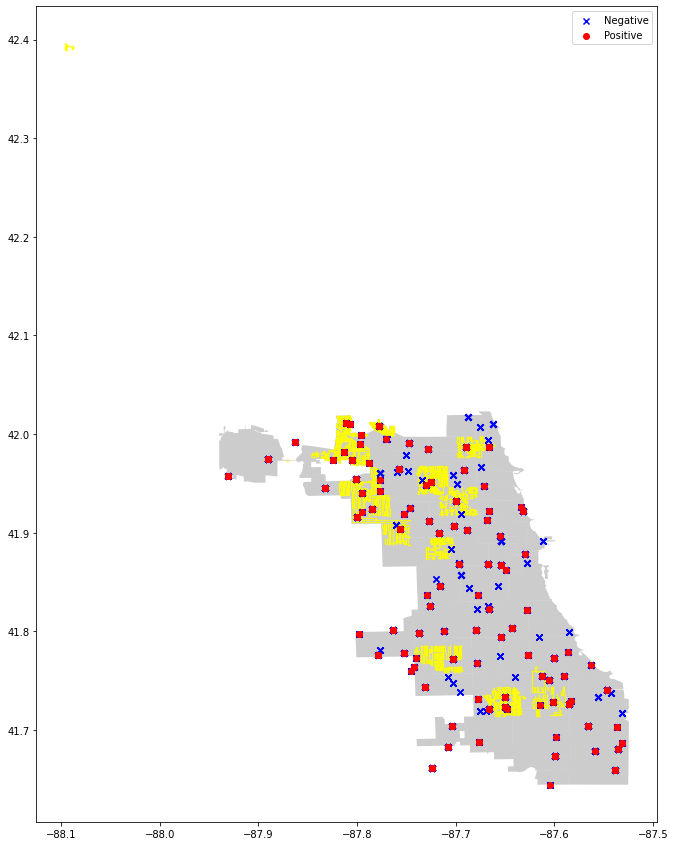

In [35]:
# Plot spray and areas with WNV present / absent
fig, ax = plt.subplots(figsize=(15,15))

chicago.plot(ax = ax, alpha=0.4, color='gray')
spray_geo.plot(ax = ax, color = 'yellow', markersize = 0.1)
train_geo[train_geo['WnvPresent']== 0].plot(ax = ax, color = 'blue', marker = 'x', label = 'Negative')
train_geo[train_geo['WnvPresent']== 1].plot(ax = ax, color = 'red', marker = 'o', label = 'Positive')
plt.legend();

Since spray points below -88 longitude are out of Chicago, we drop these points.

In [36]:
spray_geo = spray_geo.loc[spray_geo['Longitude'] > -88, :]

In [37]:
spray = spray.loc[spray['Longitude'] > -88, :]

# Spray EDA

<ipython-input-38-94bd2c1d8cc4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['0000', '0300', '0600', '0900', '1200', '1500', '1800', '2100', '2400'])


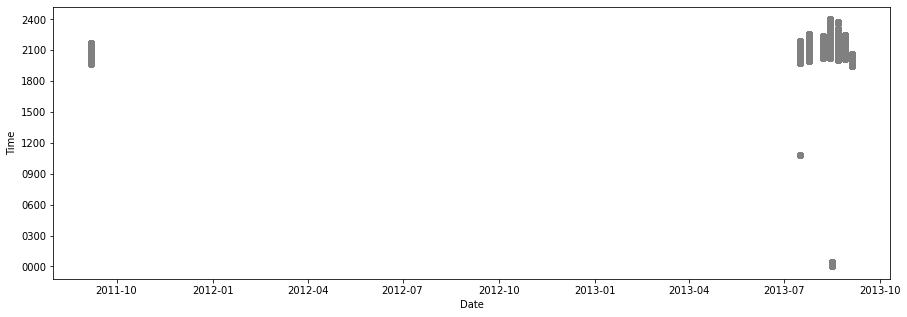

In [38]:
# Plot scatterplot of time of spray.
plt.figure(figsize=(15,5))
plt.scatter(x=spray["Date"], y=spray["Time"], color = "grey")
plt.gca().set_yticklabels(['0000', '0300', '0600', '0900', '1200', '1500', '1800', '2100', '2400'])
plt.xlabel("Date")
plt.ylabel("Time");



We can see that spraying occurs in the evening most of the time which corroborates with the article. [source](https://www.cdc.gov/zika/pdfs/truckmounted-factsheet.pdf) However, since there is insufficient information (data not provided on an hourly or daily basis) in the train dataset, we are unable to find out whether the time of spray had any immediate effect on the mosquito population.

In [39]:
## Group spray by date, drop irrelevant columns
num_spray = spray.groupby(by="Date").count()
num_spray.drop(columns=["Latitude","Longitude","geometry"], inplace=True)
## Rename column to "no. of sprays" 
num_spray.rename(columns={"Time":"No. of Sprays"}, inplace=True)
## Reset index
num_spray.reset_index(inplace=True)
num_spray

,Date,No. of Sprays
0,2011-09-07,1573
1,2013-07-17,2202
2,2013-07-25,1607
3,2013-08-08,1195
4,2013-08-15,2668
5,2013-08-16,141
6,2013-08-22,1587
7,2013-08-29,2302
8,2013-09-05,924


There are only 10 days worth of spraying data available. We can see that sprays are weekly occurrences. The number of sprays also vary wildly, and are centered on different locations.

In [40]:
## Group train dataset by "Date" 
date_mos = train.groupby(by="Date").sum()
# Reset index
date_mos.reset_index(inplace=True)
date_mos.head()

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
0,2007-05-29,906,1046.922110,-2192.404258,198,40,0,50175,125
1,2007-06-05,2217,2512.953427,-5262.973680,492,127,0,120420,360
2,2007-06-26,2820,2890.897429,-6052.687983,570,215,0,138483,414
3,2007-06-29,1726,1926.696760,-4034.843843,375,85,0,92322,276
4,2007-07-02,3012,3099.631846,-6491.067046,605,240,0,148518,518


In [41]:
## Merge datasets 
combined = pd.merge(date_mos, num_spray, how="outer", on=["Date"])
## Replace null values with "0"
combined["No. of Sprays"].replace(np.NaN,0, inplace=True)
## Drop unnecessary columns
combined.drop(columns=["Block","Latitude","Longitude","AddressAccuracy","year","month"], inplace=True)
## Sort values by earliest date
combined.sort_values(by = "Date", inplace=True)
## For purpose of charting, remove data before spray took 
## place (i.e. before 2011/1/1)
combined = combined.loc[combined["Date"]>"2011-1-1"]
combined

,Date,NumMosquitos,WnvPresent,No. of Sprays
59,2011-06-10,425.0,0.0,0.0
60,2011-06-17,830.0,0.0,0.0
61,2011-06-24,846.0,0.0,0.0
62,2011-06-30,1944.0,0.0,0.0
63,2011-07-11,2091.0,0.0,0.0
64,2011-07-15,2497.0,0.0,0.0
65,2011-07-25,2449.0,3.0,0.0
66,2011-07-29,1408.0,7.0,0.0
67,2011-08-05,1065.0,4.0,0.0
68,2011-08-12,823.0,7.0,0.0


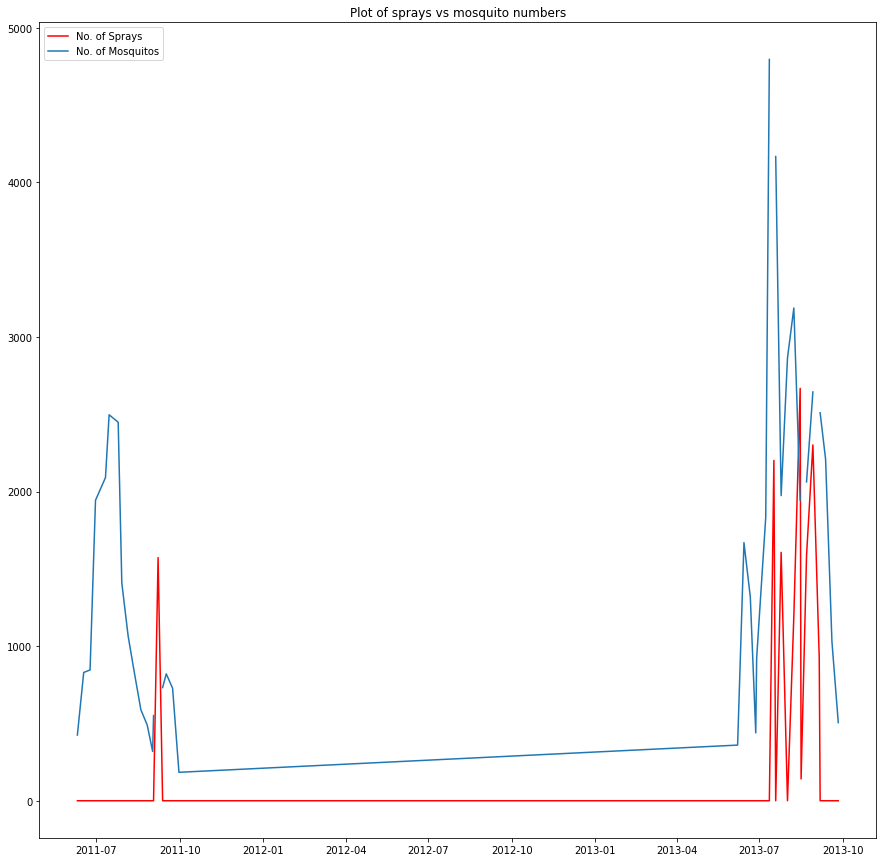

In [42]:
# Plot sprays against mosquito numbers
plt.figure(figsize=(15, 15))
plt.plot(combined["Date"], combined["No. of Sprays"], label = "No. of Sprays", color = "red")
plt.plot(combined["Date"], combined["NumMosquitos"], label = "No. of Mosquitos")
plt.title('Plot of sprays vs mosquito numbers')
plt.legend();

We can see that after spraying, there is usually an immediate drop in the number of mosquitoes. In an exceptional case, however, there was an increase in number of mosquitoes, but this can be accounted by the fact that the number of mosquitoes taken in this graph is the total number of mosquitoes in Chicago, and thus could be caused by nests that were not sprayed.

In [43]:
# Create function to add year, month and day columns
def addymdcols(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day

In [44]:
addymdcols(spray_geo)
addymdcols(train_geo)

In [45]:
# Masks for year 2011, 2013 
spray_geo2013 = spray_geo.loc[spray_geo['year']==2013]
spray_geo2011 = spray_geo.loc[spray_geo['year']==2011]

In [46]:
# View number of occurences of spray on a specific day
spray_geo2013.value_counts(['month', 'day'])

month  day
8      15     2668
       29     2302
7      17     2202
       25     1607
8      22     1587
       8      1195
9      5       924
8      16      141
dtype: int64

In [47]:
# Filter for data on 2013-08-16 
spray_geo2013.loc[(spray_geo2013['month']==8)&(spray_geo2013['day']==16)]

,Time,Latitude,Longitude,geometry,year,month,day
Date,,,,,,,
2013-08-16,1900-01-01 00:00:28,41.960033,-87.785495,POINT (-87.78549 41.96003),2013,8,16
2013-08-16,1900-01-01 00:00:38,41.959468,-87.785478,POINT (-87.78548 41.95947),2013,8,16
2013-08-16,1900-01-01 00:00:48,41.958977,-87.785457,POINT (-87.78546 41.95898),2013,8,16
2013-08-16,1900-01-01 00:00:58,41.958485,-87.785438,POINT (-87.78544 41.95849),2013,8,16
2013-08-16,1900-01-01 00:01:08,41.958002,-87.785443,POINT (-87.78544 41.95800),2013,8,16
...,...,...,...,...,...,...,...
2013-08-16,1900-01-01 00:23:59,41.962420,-87.780742,POINT (-87.78074 41.96242),2013,8,16
2013-08-16,1900-01-01 00:24:19,41.963870,-87.780802,POINT (-87.78080 41.96387),2013,8,16
2013-08-16,1900-01-01 00:24:29,41.964423,-87.780807,POINT (-87.78081 41.96442),2013,8,16


We can see that there were sprays on 17 Jul, 25 Jul, 8 Aug, 15 Aug (with some leaking to 16 Aug midnight), 22 Aug, 29 Aug, 5 Sep.

In [48]:
## Create function to obtain the dates a day before and after spray
def get_date(df, year, month, afterday, beforeday):
    return df.loc[(df['year']==year)&(df['month']==month)&(df['day']>=afterday)&(df['day']<beforeday)]

In [49]:
spray2011 = get_date(spray_geo, 2011, 9, 7, 31)
spray2013jul17 = get_date(spray_geo, 2013, 7, 17, 25)
spray2013jul25 = get_date(spray_geo, 2013, 7, 25, 31)
spray2013aug8 = get_date(spray_geo, 2013, 8, 8, 15)
spray2013aug15 = get_date(spray_geo, 2013, 8, 15, 22)
spray2013aug22 = get_date(spray_geo, 2013, 8, 22, 29)
spray2013aug29 = get_date(spray_geo, 2013, 8, 29, 31)
spray2013sep5 = get_date(spray_geo, 2013, 9, 5, 12)

In [50]:
train2011BS = get_date(train_geo, 2011, 9, 1, 6)
train2013jul17BS = get_date(train_geo, 2013, 7, 1, 16)
train2013jul25BS = get_date(train_geo, 2013, 7, 17, 24)
train2013aug8BS = get_date(train_geo, 2013, 8, 1, 7)
train2013aug15BS = get_date(train_geo, 2013, 8, 8, 14)
train2013aug22BS = get_date(train_geo, 2013, 8, 15, 21)
train2013aug29BS = get_date(train_geo, 2013, 8, 21, 28)
train2013sep5BS = get_date(train_geo, 2013, 8, 29, 31)

In [51]:
train2011AS = get_date(train_geo, 2011, 9, 7, 15)
train2013jul17AS = get_date(train_geo, 2013, 7, 17, 25)
train2013jul25AS = get_date(train_geo, 2013, 7, 25, 31)
train2013aug8AS = get_date(train_geo, 2013, 8, 8, 15)
train2013aug15AS = get_date(train_geo, 2013, 8, 15, 22)
train2013aug22AS = get_date(train_geo, 2013, 8, 22, 29)
train2013aug29AS = get_date(train_geo, 2013, 8, 29, 31)
train2013sep5AS = get_date(train_geo, 2013, 9, 5, 12)

In [52]:
## Create function to plot spray against presence of WMV 
## before and after spray
def plotmap_spraytrain(spray, trainbefore, trainafter, date):

    fig, ax = plt.subplots(figsize=(15,15))

    chicago.plot(ax = ax, alpha=0.4, color='gray')
    spray.plot(ax = ax, color = 'yellow', marker = 's', label = 'Spray')
    trainbefore[trainbefore['WnvPresent']== 1].plot(ax = ax, color = 'blue', marker = 'o', markersize=100, label = 'Before')
    trainafter[trainafter['WnvPresent']== 1].plot(ax = ax, color = 'red', marker = 'o', label = 'After')
    plt.title(f'Effects of spraying 1 week after {date}')
    plt.legend();

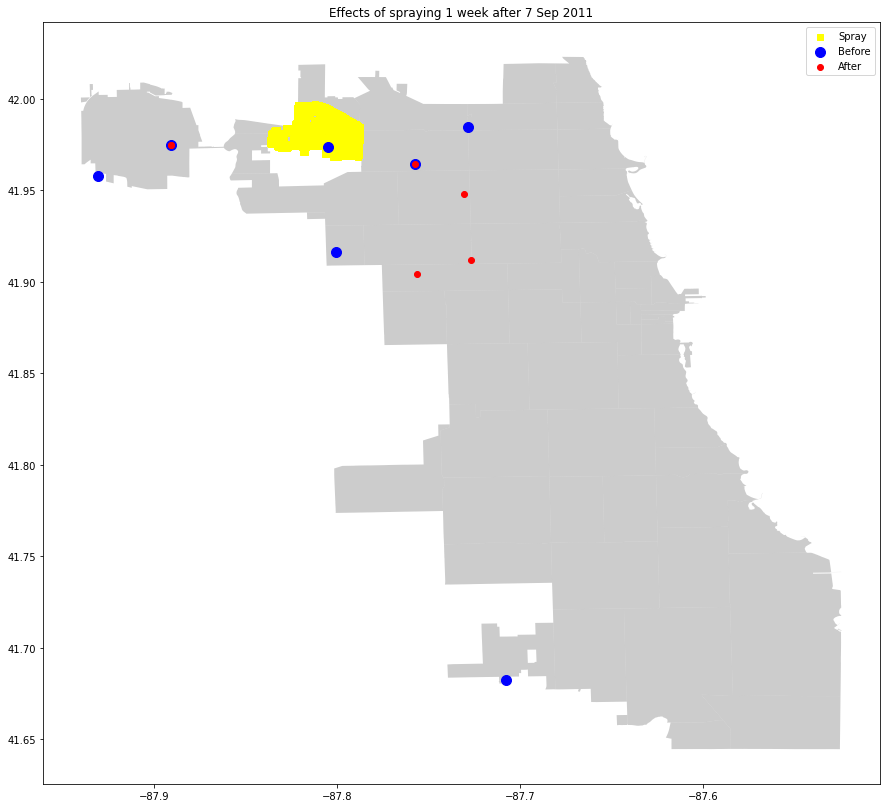

In [53]:
plotmap_spraytrain(spray2011, train2011BS, train2011AS, '7 Sep 2011')

7 Sep 2011 - Spraying was effective in eliminating WNV.

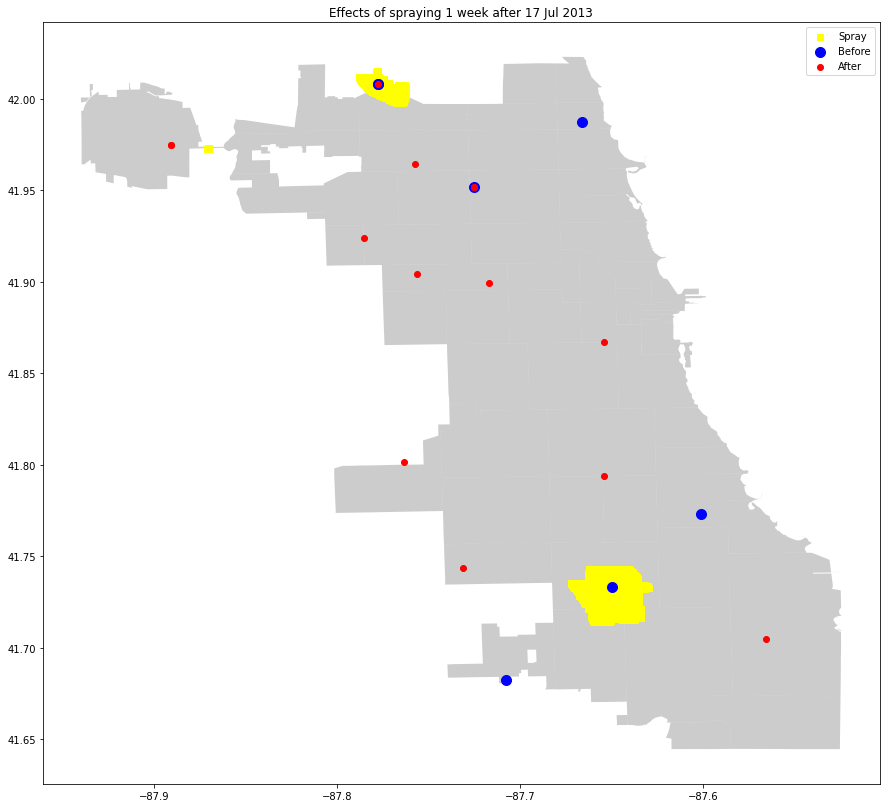

In [54]:
plotmap_spraytrain(spray2013jul17, train2013jul17BS, train2013jul17AS, '17 Jul 2013')

17 July 2013 - Spraying was effective in eliminating WNV in 1 area, ineffective in 1 area.

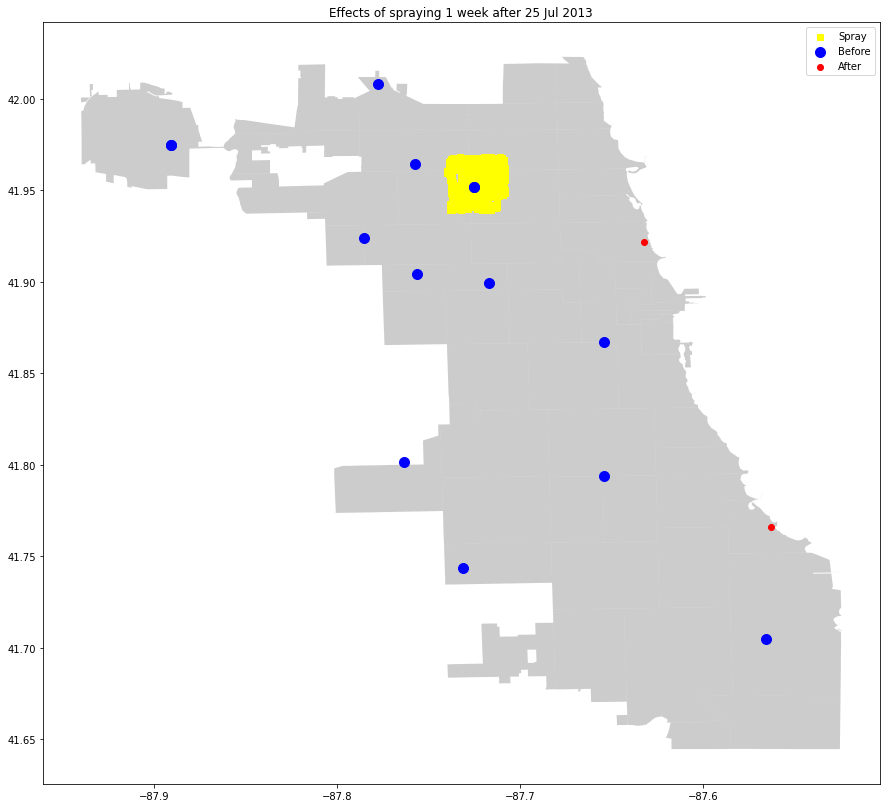

In [55]:
plotmap_spraytrain(spray2013jul25, train2013jul25BS, train2013jul25AS, '25 Jul 2013')

25 July 2013 - Spraying was effective in eliminating WNV.

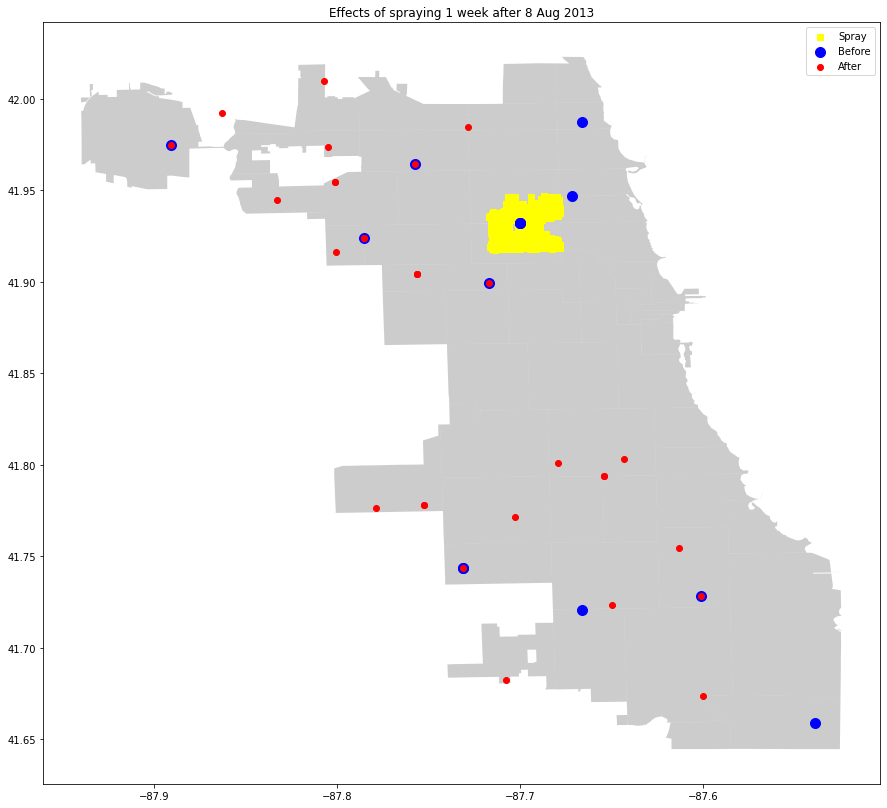

In [56]:
plotmap_spraytrain(spray2013aug8, train2013aug8BS, train2013aug8AS, '8 Aug 2013')

8 Aug 2013 - Spraying was effective in eliminating 2 areas of WNV.

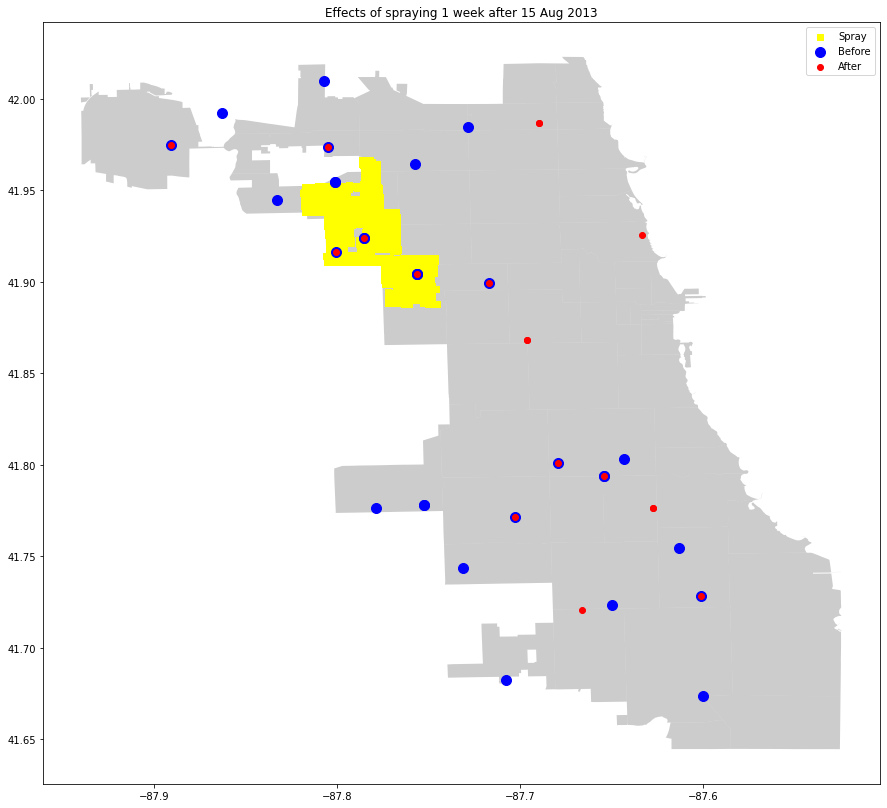

In [57]:
plotmap_spraytrain(spray2013aug15, train2013aug15BS, train2013aug15AS, '15 Aug 2013')

15 Aug 2013 - Spraying was effective in eliminating WNV in 1 area, ineffective in 3 areas.

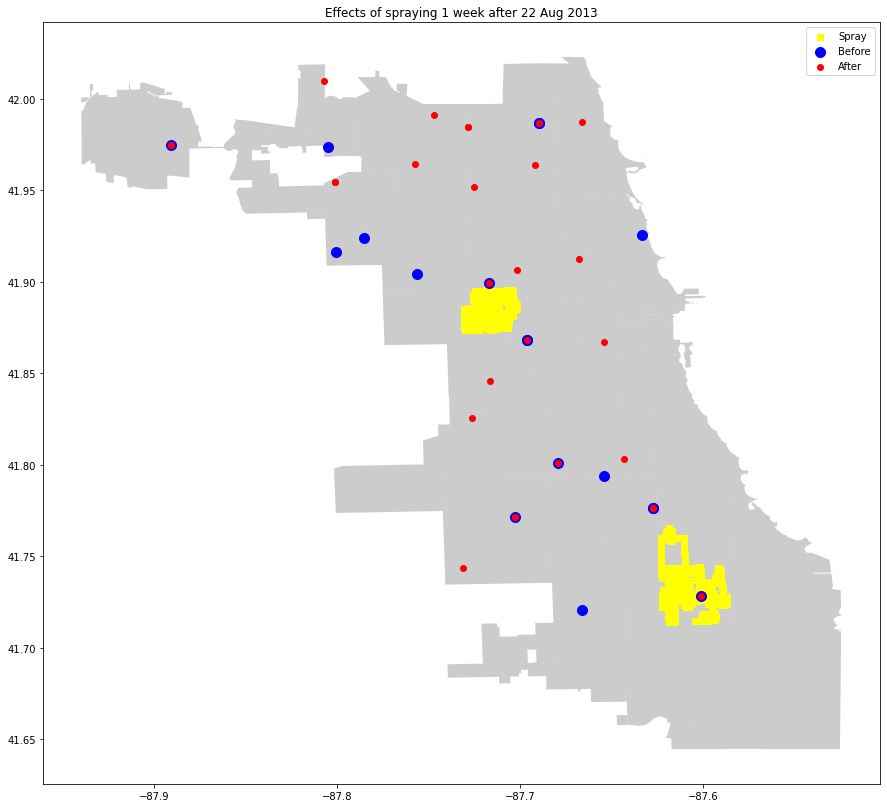

In [58]:
plotmap_spraytrain(spray2013aug22, train2013aug22BS, train2013aug22AS, '22 Aug 2013')

22 Aug 2013 - Spraying was ineffective in eliminating WNV in 3 areas.

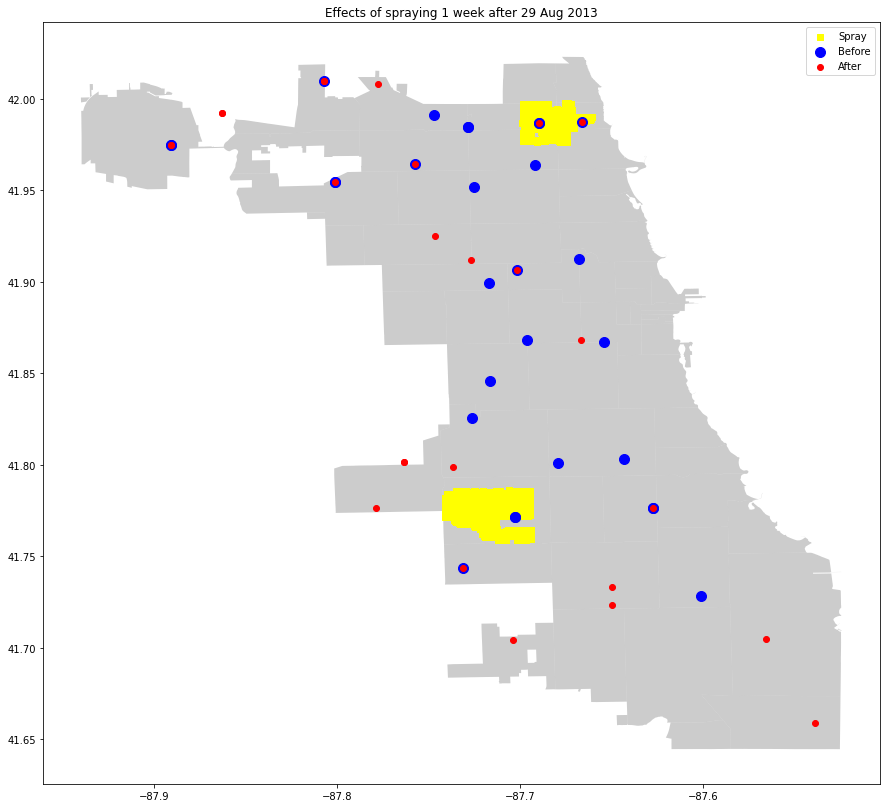

In [59]:
plotmap_spraytrain(spray2013aug29, train2013aug29BS, train2013aug29AS, '29 Aug 2013')

29 Aug 2013 - Spraying was effective in eliminating WNV in 1 area, ineffective in 2 areas.

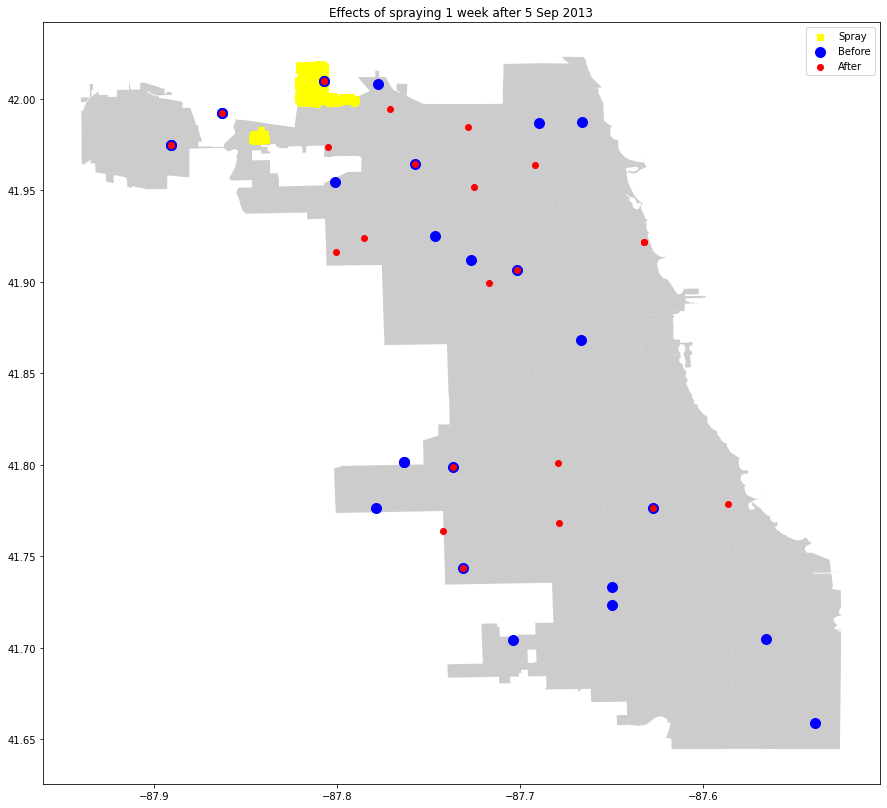

In [60]:
plotmap_spraytrain(spray2013sep5, train2013sep5BS, train2013sep5AS, '5 Sep 2013')

5 Sep 2013 - Spraying was ineffective in eliminating WNV in 1 area.

To summarize effectiveness of sprays:

|Date|Areas Effective|Areas Ineffective|
|----|---------------|-----------------|
|7 Sep 2011|1|0|
|17 Jul 2013|1|1|
|25 Jul 2013|1|0|
|8 Aug 2013|2|0|
|15 Aug 2013|1|3|
|22 Aug 2013|0|3|
|29 Aug 2013|1|2|
|5 Sep 2013|0|1|

The rate of success in eradicating WNV in sprayed areas is 7 / 17 = 41.18%. This is quite a significant rate, considering we are not looking at a decrease in mosquito numbers but eradicating WNV as a whole from that area.

From this, we can conclude that spraying is quite effective.

# <span style="color:red">END OF EDITS</span>